In [1]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
from sklearn.model_selection import train_test_split

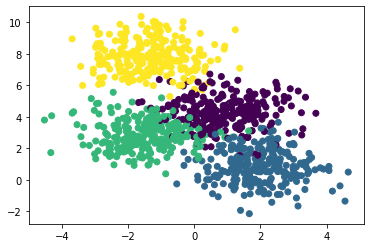

In [2]:
pl.scatter(X[:,0],X[:,1],c=y)

In [3]:
y=np.mod(y,2)

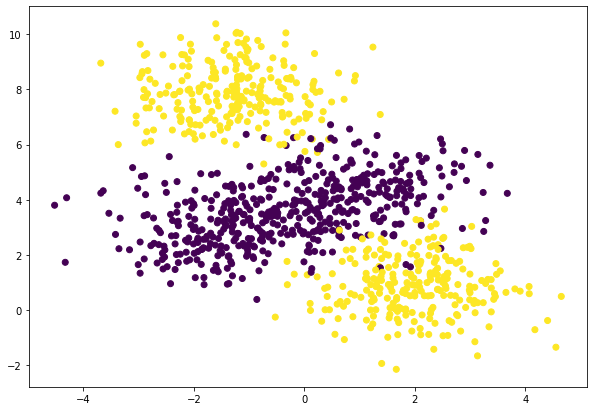

In [30]:
pl.figure(figsize=(10,7))
pl.scatter(X[:,0],X[:,1],c=y)
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

In [203]:
class Multi_N:
    def __init__(self,layers):
        self.input_layers,self.hidden_layers,self.output_layers=layers
        
        self.Weights1=np.random.randn(self.hidden_layers,self.input_layers)
        self.Bias1=np.random.randn(self.hidden_layers).reshape(-1,1)
        
        self.Weights2=np.random.randn(self.output_layers,self.hidden_layers)
        self.Bias2=np.random.randn(self.output_layers).reshape(-1,1)
#         self.Weights1=Weights1
#         self.Bias1=Bias1
        
#         self.Weights2=Weights2
#         self.Bias2=Bias2
    
    
    def Forward_Formula(self,X,W,B):
        z=np.dot(X,W.T)+B.T
        return z.astype(np.float32)
        
    def Sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))

    def loss(self,Y_original,Y_predicted):
#         print(Y_original.shape,Y_predicted.shape)
        loss=(0.5*mean_squared_error(Y_original,Y_predicted))
        return loss
        
    def Forward(self,X):
        self.A1=self.Forward_Formula(X,self.Weights1,self.Bias1)
        self.H1=self.Sigmoid(self.A1)
        
        self.A2=self.Forward_Formula(self.H1,self.Weights2,self.Bias2)
        self.H2=self.Sigmoid(self.A2)
        return self.H2
    
    def Gradient(self,X,Y):
        Y=Y.reshape(-1,1) if (Y.ndim==1) else Y
        Y_predicted=self.Forward(X)
        
#         //derivatives from output to hidden
        self.DA2=(((Y_predicted-Y)*Y_predicted*(1-Y_predicted)))
        self.DW2=self.DA2.T.dot(self.H1)
        self.DB2=self.DA2.sum(axis=0).reshape(-1,1)
        
#         //derivatives from hidden to input
        self.DA1=self.DA2*(self.Weights2)*self.H1*(1-self.H1)
        self.DW1=(self.DA1).sum(axis=0).reshape(-1,1)*self.Weights1
        self.DB1=(self.DA1).sum(axis=0).reshape(-1,1)
        return Y_predicted
    
    def fit(self,X,Y,epochs,lr,rand_init=True):
        Y=Y.reshape(-1,1) if(Y.ndim==1) else Y
        mse_lists=[]
        min_batch_size=X.shape[0]
        prev_w1,prev_w2,prev_b1,prev_b2,gamma=0,0,0,0,0.9
        for i in range(epochs):
            Y_predicted=self.Gradient(X,Y)
            mse=self.loss(Y,Y_predicted)
            mse_lists.append(mse)
            
            v_w1=gamma*prev_w1+lr*(self.DW1/min_batch_size)
            v_w2=gamma*prev_w2+lr*(self.DW2/min_batch_size)
            v_b1=gamma*prev_b1+lr*(self.DB1/min_batch_size)
            v_b2=gamma*prev_b2+lr*(self.DB2/min_batch_size)
            
            self.Weights1=self.Weights1-v_w1
            self.Weights2=self.Weights2-v_w2
            self.Bias1=self.Bias1-v_b1
            self.Bias2=self.Bias2-v_b2
            
            prev_w1=v_w1
            prev_w2=v_w2
            prev_b1=v_b1
            prev_b2=v_b2
            
            
            
#             self.Weights2=self.Weights2-lr*(self.DW2/min_batch_size)
#             self.Bias2=self.Bias2-lr*(self.DB2/min_batch_size)
#             self.Weights1=self.Weights1-lr*(self.DW1/min_batch_size)
#             self.Bias1=self.Bias1-lr*(self.DB1/min_batch_size)
        return mse_lists
    def predict(self,X,thresh=0.5):
        Y_pred=self.Forward(X)
        return(Y_pred>thresh).astype(int).ravel()


In [204]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=0)
multi=Multi_N([2,10,1])
errors=multi.fit(X_train,y_train,epochs=10000,lr=0.01)


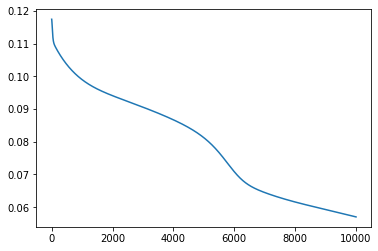

In [226]:
pl.plot(errors)

In [227]:
y_train_pred=multi.predict(X_train)

In [228]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.932

In [229]:
y_test_pred=multi.predict(X_test)
accuracy_score(y_test_pred,y_test)

0.92